# 逻辑回归

逻辑回归主要应用与分类的问题，Logistic 回归的本质是：假设数据服从这个分布，然后使用极大似然估计做参数的估计。
Logistic 回归的分布函数写为：$$F(x) = P(X \le x ) = \frac{1}{1 + e^{-(x-\mu)} / \gamma }$$
密度函数：$$f(x) = F'(X \le x) = \frac{e^{-(x-\mu)/\gamma}}{\gamma(1 + e ^ {-(x - \mu) / \gamma}) ^ {2}}$$
$\mu —————— 位置参数$  
$\gamma —————— 形状参数$

使用对数几率函数来拟合条件概率。$$y = \frac{1}{1+e^{-(w^Tx + b)}}$$  
于是有：  
$$ln\frac{y}{1-y}=w^Tx + b$$

将 y 视为 x 为正例的概率，则 1-y 为 x 为其反例的概率。两者的比值称为几率（odds），指该事件发生与不发生的概率比值，若事件发生的概率为 p。则对数几率：$$ln(odds)=ln\frac{y}{1-y}$$
进而可以得出：$$w^Tx+b = ln\frac{P(Y=1|x)}{1-P(Y=1|x)}$$
$$P(Y=1|x)=\frac{1}{1+e^{-(w^Tx + b)}}$$

设 $P(Y=1|X)=p(x)$  
$P(Y=0|x)=1-p(x)$  
似然函数：  
$$L(w)=\prod \left [ p(x_i) \right ]^{y_i}\left [ 1-p(x_i) \right ]^{1-y_i} $$  
对数似然函数：
$$L(w)=\sum \left [ y_ilnp(x_i)+(1-y_i)ln(1-p(x_i)) \right ] $$
$$=\sum \left [ y_iln\frac{p(x_i)}{1-p(x_i)}+ln(1-p(x_i)) \right ]$$
$$=\sum \left [ y_i(w\cdot x_i) - ln(1+e^{w\cdot x_i}) \right ] $$
代价函数：
$$J(w)=-\frac{1}{N}lnL(w)$$

In [1]:
import torch 
import torch.autograd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

读数据集

In [2]:
data_set = pd.read_csv("ionosphere_data_kaggle.csv")

In [3]:
data_set.describe

<bound method NDFrame.describe of      feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           1         0   0.99539  -0.05889   0.85243   0.02306   0.83398   
1           1         0   1.00000  -0.18829   0.93035  -0.36156  -0.10868   
2           1         0   1.00000  -0.03365   1.00000   0.00485   1.00000   
3           1         0   1.00000  -0.45161   1.00000   1.00000   0.71216   
4           1         0   1.00000  -0.02401   0.94140   0.06531   0.92106   
..        ...       ...       ...       ...       ...       ...       ...   
346         1         0   0.83508   0.08298   0.73739  -0.14706   0.84349   
347         1         0   0.95113   0.00419   0.95183  -0.02723   0.93438   
348         1         0   0.94701  -0.00034   0.93207  -0.03227   0.95177   
349         1         0   0.90608  -0.01657   0.98122  -0.01989   0.95691   
350         1         0   0.84710   0.13533   0.73638  -0.06151   0.87873   

     feature8  feature9  feature10  ...  

划分数据集

In [4]:
x = data_set.loc[:, "feature1": "feature34" ]
y = data_set.loc[:, "label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train = x_train.astype('float')
x_test = x_test.astype('float')

# 编码
enc=preprocessing.LabelEncoder()   #获取一个LabelEncoder
enc=enc.fit(["g", "b"])  #训练LabelEncoder
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

y_train  = y_train.astype('float')
y_test  = y_test.astype('float')

# 将 pandas.DataFrame 转为 torch.tensor
x_train = torch.tensor(x_train.values, requires_grad=True)
y_train = torch.tensor(y_train, requires_grad=True)
y_test = torch.tensor(y_test, requires_grad=True)
x_test = torch.tensor(x_test.values, requires_grad=True)

In [5]:
def sigmoid(w, b, x):
    res = 1 / (1 + torch.exp(-(torch.matmul(x, w) + b)))
    return res

def J_func(y_train, y_hat):
    return y_train * torch.log(y_hat) + (1 - y_train) * torch.log(1 - y_hat)

In [6]:
l_rate = 0.01
n = torch.tensor([float(x_train.size()[0])], requires_grad=True)
w = torch.tensor(np.ones(x_train.size()[1]), requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

for i in range(0, 5000):
    J = J_func(y_train, sigmoid(w, b, x_train))
    J = - J.sum() / n
    J.backward()
    with torch.no_grad():
        w.data = w.data - l_rate * (w.grad.data )
        b.data = b.data - l_rate * (b.grad.data )
        print("第 %d 次 w = " % (i))
        print(w.data)
        print("b = ")
        print(b.data)
        w.grad.zero_()
        b.grad.zero_()

第 0 次 w = 
tensor([0.9979, 1.0000, 0.9990, 1.0001, 0.9992, 1.0000, 0.9992, 1.0003, 0.9989,
        0.9998, 0.9986, 0.9999, 0.9991, 0.9999, 0.9991, 1.0000, 0.9987, 1.0000,
        0.9988, 0.9999, 0.9993, 0.9995, 0.9992, 1.0002, 0.9991, 1.0000, 0.9979,
        1.0000, 0.9992, 0.9998, 0.9995, 0.9997, 0.9993, 0.9998],
       dtype=torch.float64)
b = 
tensor([0.9971])
第 1 次 w = 
tensor([0.9958, 1.0000, 0.9979, 1.0002, 0.9984, 1.0001, 0.9983, 1.0005, 0.9978,
        0.9997, 0.9973, 0.9997, 0.9982, 0.9998, 0.9983, 1.0001, 0.9975, 1.0000,
        0.9976, 0.9997, 0.9986, 0.9989, 0.9984, 1.0003, 0.9982, 1.0000, 0.9959,
        1.0000, 0.9984, 0.9996, 0.9991, 0.9994, 0.9986, 0.9997],
       dtype=torch.float64)
b = 
tensor([0.9943])
第 2 次 w = 
tensor([0.9937, 1.0000, 0.9969, 1.0003, 0.9977, 1.0001, 0.9975, 1.0008, 0.9967,
        0.9995, 0.9959, 0.9996, 0.9974, 0.9998, 0.9974, 1.0001, 0.9962, 1.0001,
        0.9964, 0.9996, 0.9978, 0.9984, 0.9976, 1.0005, 0.9973, 1.0000, 0.9938,
        1.0000, 0

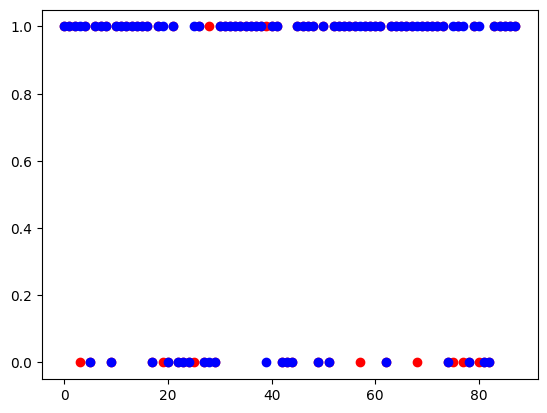

In [10]:
y_hat = np.zeros(int(x_test.size()[0]))

for i in range(int(x_test.size()[0])):
    y_hat[i] = sigmoid(w, b, x_test[i])
    if(y_hat[i] > 0.5):
        y_hat[i] = 1
    else:
        y_hat[i] = 0

x_cur = np.array(range(0, x_test.size()[0]))
y_test = y_test.detach().numpy()
plt.scatter(x_cur, y_test, c='r')
plt.scatter(x_cur, y_hat, c = "b")
plt.show()